### ABIGAIL WOOLLEY
### ZINDI FLOOD PRESICTION PROBLEM
### TEAM NAME: GH

----

In [96]:
#Imports of libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sb

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, metrics 


# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install stepwise-regression

----

In [97]:
data = pd.read_csv('Train.csv',header=0,encoding = 'unicode_escape', parse_dates=False)
data.drop

<bound method DataFrame.drop of            X      Y  target_2015   elevation  precip 2014-11-16 - 2014-11-23  \
0      34.26 -15.91          0.0  887.764222                        0.000000   
1      34.26 -15.90          0.0  743.403912                        0.000000   
2      34.26 -15.89          0.0  565.728343                        0.000000   
3      34.26 -15.88          0.0  443.392774                        0.000000   
4      34.26 -15.87          0.0  437.443428                        0.000000   
...      ...    ...          ...         ...                             ...   
16461  35.86 -15.44          0.0  635.675022                       16.956563   
16462  35.86 -15.43          0.0  632.598892                       16.956563   
16463  35.86 -15.42          0.0  632.450136                       16.956563   
16464  35.86 -15.41          0.0  629.272733                       16.956563   
16465  35.86 -15.40          0.0  626.164641                       16.956563   

       

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16466 entries, 0 to 16465
Data columns (total 40 columns):
X                                 16466 non-null float64
Y                                 16466 non-null float64
target_2015                       16466 non-null float64
elevation                         16466 non-null float64
precip 2014-11-16 - 2014-11-23    16466 non-null float64
precip 2014-11-23 - 2014-11-30    16466 non-null float64
precip 2014-11-30 - 2014-12-07    16466 non-null float64
precip 2014-12-07 - 2014-12-14    16466 non-null float64
precip 2014-12-14 - 2014-12-21    16466 non-null float64
precip 2014-12-21 - 2014-12-28    16466 non-null float64
precip 2014-12-28 - 2015-01-04    16466 non-null float64
precip 2015-01-04 - 2015-01-11    16466 non-null float64
precip 2015-01-11 - 2015-01-18    16466 non-null float64
precip 2015-01-18 - 2015-01-25    16466 non-null float64
precip 2015-01-25 - 2015-02-01    16466 non-null float64
precip 2015-02-01 - 2015-02-08    16

## Extract Training Dataset

#### Extract all the 2015 columns

In [99]:
prec_2015 = data.filter(like='2015')
prec_2015 = prec_2015.drop(['target_2015'], axis=1)
prec_2015

,precip 2014-12-28 - 2015-01-04,precip 2015-01-04 - 2015-01-11,precip 2015-01-11 - 2015-01-18,precip 2015-01-18 - 2015-01-25,precip 2015-01-25 - 2015-02-01,precip 2015-02-01 - 2015-02-08,precip 2015-02-08 - 2015-02-15,precip 2015-02-15 - 2015-02-22,precip 2015-02-22 - 2015-03-01,precip 2015-03-01 - 2015-03-08,precip 2015-03-08 - 2015-03-15
0,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.000000
1,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.000000
2,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.000000
3,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.000000
4,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
16461,15.765685,21.457507,105.275891,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,21.428131,2.493683
16462,15.765685,21.457507,105.275891,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,21.428131,2.493683
16463,15.765685,21.457507,105.275891,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,21.428131,2.493683
16464,15.765685,21.457507,105.275891,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,21.428131,2.493683


#### This represents 2 months before the flood: - Extract 2014 columns to and add to the dataset

In [100]:
prec_2014 = data.filter(like='2014')
prec_2014

,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,precip 2014-12-28 - 2015-01-04
0,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,57.451361
1,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,57.451361
2,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,57.451361
3,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,57.451361
4,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,57.451361
...,...,...,...,...,...,...,...
16461,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,15.765685
16462,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,15.765685
16463,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,15.765685
16464,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,15.765685


#### Include additional features provided

In [101]:
rem_features1 =  data.iloc[:, 0:4:]

rem_features2 = data.iloc[:, 38:40:] 


rem_features1 = rem_features1.merge(rem_features2, how = 'left', left_index=True, right_index = True)



#For 2015:

train_2015 = rem_features1.merge(prec_2014, how='right', left_index = True, right_index=True)

train_2015 = train_2015.merge(prec_2015, how='left',left_index=True, right_index=True,)


#Add the remaining datasets to the extreme left of the original dataset to 2015 dataset:

train_2015 = train_2015.drop(['precip 2014-12-28 - 2015-01-04_x'],axis = 1)
train_2015 = train_2015.rename(columns={'precip 2014-12-28 - 2015-01-04_y': 'precip 2014-12-28 - 2015-01-04'})


train_2015

,X,Y,target_2015,elevation,LC_Type1_mode,Square_ID,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,...,precip 2015-01-04 - 2015-01-11,precip 2015-01-11 - 2015-01-18,precip 2015-01-18 - 2015-01-25,precip 2015-01-25 - 2015-02-01,precip 2015-02-01 - 2015-02-08,precip 2015-02-08 - 2015-02-15,precip 2015-02-15 - 2015-02-22,precip 2015-02-22 - 2015-03-01,precip 2015-03-01 - 2015-03-08,precip 2015-03-08 - 2015-03-15
0,34.26,-15.91,0.0,887.764222,9,4e3c3896-14ce-11ea-bce5-f49634744a41,0.000000,0.000000,0.000000,14.844025,...,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.000000
1,34.26,-15.90,0.0,743.403912,9,4e3c3897-14ce-11ea-bce5-f49634744a41,0.000000,0.000000,0.000000,14.844025,...,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.000000
2,34.26,-15.89,0.0,565.728343,9,4e3c3898-14ce-11ea-bce5-f49634744a41,0.000000,0.000000,0.000000,14.844025,...,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.000000
3,34.26,-15.88,0.0,443.392774,10,4e3c3899-14ce-11ea-bce5-f49634744a41,0.000000,0.000000,0.000000,14.844025,...,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.000000
4,34.26,-15.87,0.0,437.443428,10,4e3c389a-14ce-11ea-bce5-f49634744a41,0.000000,0.000000,0.000000,14.844025,...,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16461,35.86,-15.44,0.0,635.675022,10,4e6f5dfd-14ce-11ea-bce5-f49634744a41,16.956563,31.155531,12.882013,8.810145,...,21.457507,105.275891,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,21.428131,2.493683
16462,35.86,-15.43,0.0,632.598892,10,4e6f5dfe-14ce-11ea-bce5-f49634744a41,16.956563,31.155531,12.882013,8.810145,...,21.457507,105.275891,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,21.428131,2.493683
16463,35.86,-15.42,0.0,632.450136,10,4e6f5dff-14ce-11ea-bce5-f49634744a41,16.956563,31.155531,12.882013,8.810145,...,21.457507,105.275891,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,21.428131,2.493683
16464,35.86,-15.41,0.0,629.272733,10,4e6f5e00-14ce-11ea-bce5-f49634744a41,16.956563,31.155531,12.882013,8.810145,...,21.457507,105.275891,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,21.428131,2.493683


#### Find correlation matrix of the dataset

In [102]:
corr_2015 = train_2015.corr() #Correlation COefficient of 2015


#### 2015 Dataset Heatmap :

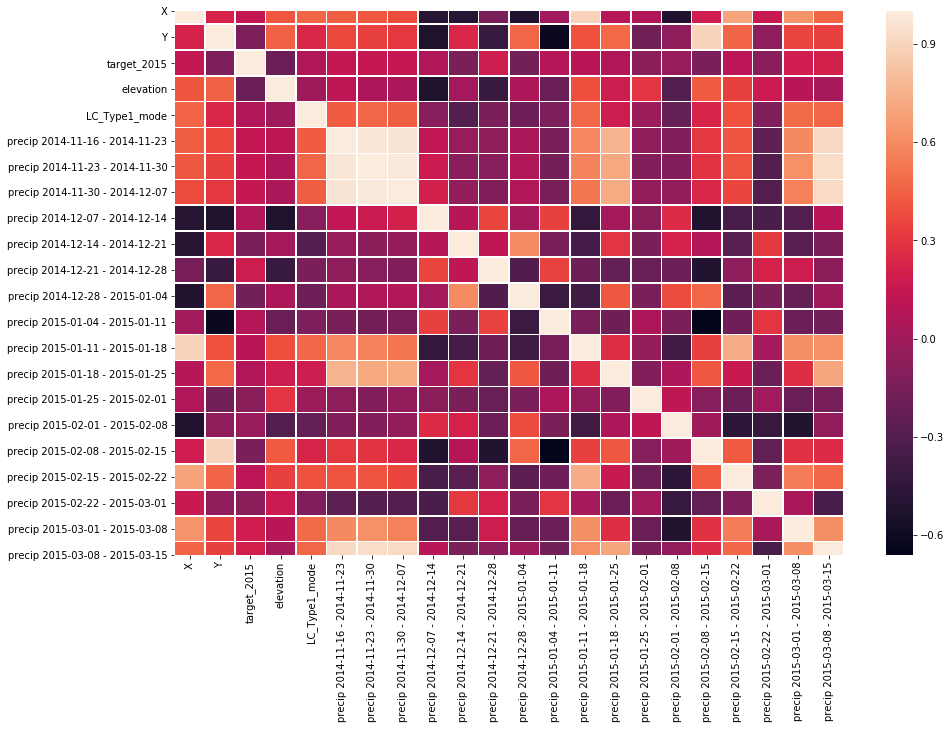

In [103]:
fig, ax = plt.subplots(figsize=(15,10)) # Fisize for the heatmap
heat_map = sb.heatmap(corr_2015.iloc[:, ::], annot=False, linewidths=.5)

#### Extract Training Dataset :

In [104]:
train_data = train_2015.drop(['target_2015','Square_ID'],axis = 1)

#### Define Explanatory Variables and Response Variable :

In [105]:
train_data_X = train_2015.drop(['target_2015','Square_ID'],axis = 1)
train_data_Y = train_2015['target_2015']

-----

----

### Data Preprocessing:

In [106]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16466 entries, 0 to 16465
Data columns (total 21 columns):
X                                 16466 non-null float64
Y                                 16466 non-null float64
elevation                         16466 non-null float64
LC_Type1_mode                     16466 non-null int64
precip 2014-11-16 - 2014-11-23    16466 non-null float64
precip 2014-11-23 - 2014-11-30    16466 non-null float64
precip 2014-11-30 - 2014-12-07    16466 non-null float64
precip 2014-12-07 - 2014-12-14    16466 non-null float64
precip 2014-12-14 - 2014-12-21    16466 non-null float64
precip 2014-12-21 - 2014-12-28    16466 non-null float64
precip 2014-12-28 - 2015-01-04    16466 non-null float64
precip 2015-01-04 - 2015-01-11    16466 non-null float64
precip 2015-01-11 - 2015-01-18    16466 non-null float64
precip 2015-01-18 - 2015-01-25    16466 non-null float64
precip 2015-01-25 - 2015-02-01    16466 non-null float64
precip 2015-02-01 - 2015-02-08    1646

-----

# Feature Slection

## Stepwise Function

In [107]:
import pandas as pd
import statsmodels.api as sm


def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return model,included

def backward_regression(X, y,
                           threshold_out,
                           verbose=False):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return model,included


### Select relevant features using stepwise function above

In [108]:
a,b = forward_regression(train_data_X,train_data_Y,0.05, verbose=True)

Add  elevation                      with p-value 5.55538e-155
Add  X                              with p-value 3.28684e-233


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  precip 2015-03-08 - 2015-03-15 with p-value 1.04097e-41
Add  precip 2014-12-21 - 2014-12-28 with p-value 7.43222e-49
Add  precip 2015-01-11 - 2015-01-18 with p-value 3.68274e-38
Add  precip 2014-11-23 - 2014-11-30 with p-value 5.92483e-38
Add  LC_Type1_mode                  with p-value 7.52782e-27
Add  precip 2015-02-22 - 2015-03-01 with p-value 2.09361e-19
Add  precip 2015-01-18 - 2015-01-25 with p-value 1.34878e-16
Add  precip 2015-02-08 - 2015-02-15 with p-value 2.74595e-12
Add  precip 2014-12-07 - 2014-12-14 with p-value 1.13749e-27
Add  precip 2014-11-16 - 2014-11-23 with p-value 4.45205e-09
Add  precip 2014-11-30 - 2014-12-07 with p-value 8.33691e-08
Add  precip 2015-02-15 - 2015-02-22 with p-value 0.00137377
Add  precip 2015-01-04 - 2015-01-11 with p-value 0.0434834


In [109]:
b

['elevation',
 'X',
 'precip 2015-03-08 - 2015-03-15',
 'precip 2014-12-21 - 2014-12-28',
 'precip 2015-01-11 - 2015-01-18',
 'precip 2014-11-23 - 2014-11-30',
 'LC_Type1_mode',
 'precip 2015-02-22 - 2015-03-01',
 'precip 2015-01-18 - 2015-01-25',
 'precip 2015-02-08 - 2015-02-15',
 'precip 2014-12-07 - 2014-12-14',
 'precip 2014-11-16 - 2014-11-23',
 'precip 2014-11-30 - 2014-12-07',
 'precip 2015-02-15 - 2015-02-22',
 'precip 2015-01-04 - 2015-01-11']

In [179]:
a,b = backward_regression(train_data_X,train_data_Y,0.05, verbose=True)

train_data_X

Drop precip 2015-01-25 - 2015-02-01 with p-value 0.949958
Drop precip 2014-12-14 - 2014-12-21 with p-value 0.919125
Drop precip 2015-03-01 - 2015-03-08 with p-value 0.890543
Drop Y                              with p-value 0.773136
Drop precip 2014-11-23 - 2014-11-30 with p-value 0.717339
Drop precip 2014-12-28 - 2015-01-04 with p-value 0.104207
Drop precip 2015-02-01 - 2015-02-08 with p-value 0.0554698


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,X,Y,elevation,LC_Type1_mode,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2015-01-04 - 2015-01-11,precip 2015-01-11 - 2015-01-18,precip 2015-01-18 - 2015-01-25,precip 2015-01-25 - 2015-02-01,precip 2015-02-01 - 2015-02-08,precip 2015-02-08 - 2015-02-15,precip 2015-02-15 - 2015-02-22,precip 2015-02-22 - 2015-03-01,precip 2015-03-01 - 2015-03-08,precip 2015-03-08 - 2015-03-15
0,34.26,-15.91,887.764222,9,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.000000
1,34.26,-15.90,743.403912,9,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.000000
2,34.26,-15.89,565.728343,9,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.000000
3,34.26,-15.88,443.392774,10,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.000000
4,34.26,-15.87,437.443428,10,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16461,35.86,-15.44,635.675022,10,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,21.457507,105.275891,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,21.428131,2.493683
16462,35.86,-15.43,632.598892,10,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,21.457507,105.275891,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,21.428131,2.493683
16463,35.86,-15.42,632.450136,10,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,21.457507,105.275891,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,21.428131,2.493683
16464,35.86,-15.41,629.272733,10,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,21.457507,105.275891,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,21.428131,2.493683


----

## Train/Test Split and Cross Validation

----

### Split Dataset into training set and test set:

In [111]:
# libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling


In [112]:
# splitting the dataset into training set and test set

X_train, X_test, Y_train, Y_test = train_test_split(train_data_X, train_data_Y, test_size=0.03, random_state=0)

#### We use feature scaling to convert different scales to a standard scale to make it easier for Machine Learning algorithms

In [113]:
#Feature Scaling:

#sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)

-----

## Build Regression Model on Training Dataset

----

In [180]:
# create linear regression object 
ln_reg = linear_model.LinearRegression() 

# fit a model
ln_model = ln_reg.fit(X_train, Y_train) 
predictions = ln_model.predict(X_test)
  
# regression coefficients 
print('Coefficients: \n', ln_reg.coef_) 
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(ln_model.score(X_test, predictions))) 


# Predicting a new result with Polynomial Regression 
#ln_model.predict(poly.fit_transform(X_test)) 

Coefficients: 
 [ 2.18163904e-01  2.12226928e-03 -1.51373797e-04 -8.54528187e-03
 -1.24055634e-02 -1.33595693e-03  1.02733732e-02 -9.12949954e-03
 -1.33847011e-04  7.85501717e-03 -3.06225768e-04 -7.63808757e-04
 -2.81335214e-03  2.02031343e-02  2.17672564e-05  6.06958890e-04
 -6.14364964e-03  5.21542461e-03 -5.74426371e-03  4.47690052e-05
  3.29175507e-02]
Variance score: 1.0


In [181]:
X_test

,X,Y,elevation,LC_Type1_mode,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2015-01-04 - 2015-01-11,precip 2015-01-11 - 2015-01-18,precip 2015-01-18 - 2015-01-25,precip 2015-01-25 - 2015-02-01,precip 2015-02-01 - 2015-02-08,precip 2015-02-08 - 2015-02-15,precip 2015-02-15 - 2015-02-22,precip 2015-02-22 - 2015-03-01,precip 2015-03-01 - 2015-03-08,precip 2015-03-08 - 2015-03-15
2869,34.67,-16.02,229.019490,10,0.000000,0.000000,0.000000,12.399667,8.853561,18.075776,...,34.097452,49.547661,0.000000,36.384603,33.686993,4.440632,1.870596,19.836449,8.550044,0.000000
10668,35.23,-16.03,766.867013,9,0.000000,0.000000,0.000000,8.410152,8.945134,7.460990,...,23.776055,57.085365,1.013265,32.313727,18.715288,5.016680,1.648338,21.233867,8.658590,0.000000
6593,34.94,-16.08,202.554138,9,0.000000,0.000000,0.000000,9.235926,8.631158,12.670775,...,23.483879,60.744787,0.000000,33.997202,36.946846,7.391024,1.382196,14.012323,8.130307,0.413405
14435,35.61,-15.67,706.170502,12,2.118858,2.963215,1.390711,1.701402,3.580342,4.697349,...,24.200220,80.470232,1.195866,27.800679,39.379012,14.092012,5.922234,14.476572,11.308650,1.232809
11343,35.28,-15.26,1044.091151,5,1.454226,4.049942,0.000000,2.623210,6.550657,9.667562,...,25.057653,66.861331,0.871677,34.363729,19.257835,23.229764,4.694098,22.249678,15.518719,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9865,35.17,-16.26,800.759843,9,0.000000,0.000000,0.000000,7.941822,7.465641,18.237181,...,34.939908,48.072915,0.488670,32.259493,23.233391,1.632181,2.861354,18.578652,13.836407,0.000000
16049,35.79,-15.65,631.077544,17,0.000000,3.479124,0.259180,3.484536,5.442788,9.064114,...,25.894999,101.238630,0.419919,14.964383,13.261280,16.172293,15.715008,12.770535,10.861721,1.639907
11806,35.33,-15.67,783.388622,12,0.000000,0.000000,0.000000,6.327859,4.614671,5.219755,...,26.430867,69.311540,0.000000,29.513627,19.378864,20.634217,4.937021,15.549508,12.351894,0.000000
14247,35.59,-15.69,707.054167,12,2.118858,2.963215,1.390711,1.701402,3.580342,4.697349,...,24.200220,80.470232,1.195866,27.800679,39.379012,14.092012,5.922234,14.476572,11.308650,1.232809


## Build DecisionTree Model on Training Dataset

----

In [182]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree


model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
model.fit(X_train, Y_train)

model.score(X_test,Y_test)


0.8641818830986199

In [183]:
y_pred = model.predict(X_test) 
y_pred

array([2.04843421e-06, 0.00000000e+00, 2.34628886e-02, 0.00000000e+00,
       2.68427052e-02, 0.00000000e+00, 2.97398878e-02, 5.98176984e-02,
       0.00000000e+00, 0.00000000e+00, 6.87180620e-07, 9.50579215e-08,
       2.64055691e-06, 0.00000000e+00, 2.04144246e-01, 9.23750423e-07,
       2.04843421e-06, 2.64055691e-06, 8.88341038e-02, 0.00000000e+00,
       1.58201038e-02, 3.75969783e-01, 1.43433952e-02, 1.15406598e-06,
       9.23750423e-07, 1.00545520e-06, 2.64055691e-06, 5.04728869e-06,
       2.11838167e-02, 8.33422669e-06, 0.00000000e+00, 2.64055691e-06,
       0.00000000e+00, 1.46829602e-06, 0.00000000e+00, 2.64055691e-06,
       1.08788128e-05, 8.33422669e-06, 8.29579646e-07, 1.57185200e-01,
       2.64055691e-06, 0.00000000e+00, 0.00000000e+00, 3.03618441e-06,
       1.34252218e-01, 0.00000000e+00, 1.03564613e-05, 2.38842645e-03,
       7.20190449e-01, 1.02912031e-01, 0.00000000e+00, 0.00000000e+00,
       1.13752393e-06, 0.00000000e+00, 2.06617822e-01, 2.64055691e-06,
      

In [156]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import explained_variance_score
model_adboost = AdaBoostRegressor()
model_adboost.fit(X_train, Y_train)
model_adboost.score(X_test,Y_test)

0.31912236957099616

# Extract Test Data from data

In [157]:
prec_2019 = data.filter(like='2019')
test_2019_X = rem_features1.merge(prec_2019, how = 'left', left_index=True, right_index = True)
test_2019_X = test_2019_X.drop(['target_2015','Square_ID'],axis = 1)

In [158]:
test_2019_X

,X,Y,elevation,LC_Type1_mode,precip 2019-01-20 - 2019-01-27,precip 2019-01-27 - 2019-02-03,precip 2019-02-03 - 2019-02-10,precip 2019-02-10 - 2019-02-17,precip 2019-02-17 - 2019-02-24,precip 2019-02-24 - 2019-03-03,...,precip 2019-03-10 - 2019-03-17,precip 2019-03-17 - 2019-03-24,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19
0,34.26,-15.91,887.764222,9,12.992620,4.582856,35.037532,4.796012,28.083314,0.000000,...,18.264692,17.537486,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,34.26,-15.90,743.403912,9,12.992620,4.582856,35.037532,4.796012,28.083314,0.000000,...,18.264692,17.537486,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,34.26,-15.89,565.728343,9,12.992620,4.582856,35.037532,4.796012,28.083314,0.000000,...,18.264692,17.537486,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,34.26,-15.88,443.392774,10,12.992620,4.582856,35.037532,4.796012,28.083314,0.000000,...,18.264692,17.537486,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,34.26,-15.87,437.443428,10,12.992620,4.582856,35.037532,4.796012,28.083314,0.000000,...,18.264692,17.537486,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16461,35.86,-15.44,635.675022,10,8.760326,5.177616,12.450319,17.289942,19.612179,10.909635,...,15.940852,24.828982,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072
16462,35.86,-15.43,632.598892,10,8.760326,5.177616,12.450319,17.289942,19.612179,10.909635,...,15.940852,24.828982,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072
16463,35.86,-15.42,632.450136,10,8.760326,5.177616,12.450319,17.289942,19.612179,10.909635,...,15.940852,24.828982,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072
16464,35.86,-15.41,629.272733,10,8.760326,5.177616,12.450319,17.289942,19.612179,10.909635,...,15.940852,24.828982,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072


In [159]:
test_2019_Y = model.predict(test_2019_X) 
test_2019_Y_ln = ln_model.predict(test_2019_X) 
test_2019_boost = model_adboost.predict(test_2019_X)


print ("Linear Regression model: ", test_2019_Y_ln)
print ("Decision Tree (Bagging Regressor): ", test_2019_Y)
print ("Adaboost Regression model: ", test_2019_boost)

Linear Regression model:  [0.25794199 0.27981558 0.30673223 ... 1.25299528 1.25349748 1.25398919]
Decision Tree (Bagging Regressor):  [0.01511412 0.01511412 0.04786639 ... 0.2888964  0.2888964  0.2888964 ]
Adaboost Regression model:  [0.01536138 0.01536138 0.05465348 ... 0.47501814 0.47501814 0.47501814]


In [178]:

#explained_variance_score(y_true, y_pred)
print("Variance score for Linear model: ",ln_model.score(train_data_Y,test_2019_Y_ln))
print("Variance score Adaboost model: ",model_adboost.score(test_2019_X,test_2019_boost ))
print("Variance score Bagging Regressor model: ",model.score(test_2019_X,test_2019_Y))

explained_variance_score(y_true, y_pred)


Variance score for Linear model:  -0.2616341639811617
Variance score Adaboost model:  1.0
Variance score Bagging Regressor model:  1.0


NameError: name 'y_true' is not defined

In [161]:
#print('Variance score: {}'.format(ln_reg.score(test_2019_X, test_2019_Y))) 

In [130]:
import csv

data = pd.read_csv('Train.csv',header=0,encoding = 'unicode_escape')

target_2019 = test_2019_Y

square_ID = data['Square_ID']

                     
#myData = pd.concat([target_2019, square_ID],axis=1)

#pd.DataFrame({target_2019,square_ID})
                 

myData = [square_ID, target_2019]
# Creating a dataframe object from listoftuples
dfObj = pd.DataFrame(myData) 
dfObj = dfObj.transpose()
dfObj.columns = ['Square_ID', 'target_2019']
dfObj.to_csv('SampleSubmission.csv', index=False)


myData = [square_ID, test_2019_Y_ln]
# Creating a dataframe object from listoftuples
dfObj = pd.DataFrame(myData) 
dfObj = dfObj.transpose()
dfObj.columns = ['Square_ID', 'target_2019']
dfObj.to_csv('ln_SampleSubmission.csv', index=False)


In [123]:
dfObj

,Square_ID,target_2019
0,4e3c3896-14ce-11ea-bce5-f49634744a41,0.257942
1,4e3c3897-14ce-11ea-bce5-f49634744a41,0.279816
2,4e3c3898-14ce-11ea-bce5-f49634744a41,0.306732
3,4e3c3899-14ce-11ea-bce5-f49634744a41,0.316727
4,4e3c389a-14ce-11ea-bce5-f49634744a41,0.317648
...,...,...
16461,4e6f5dfd-14ce-11ea-bce5-f49634744a41,1.25246
16462,4e6f5dfe-14ce-11ea-bce5-f49634744a41,1.25295
16463,4e6f5dff-14ce-11ea-bce5-f49634744a41,1.253
16464,4e6f5e00-14ce-11ea-bce5-f49634744a41,1.2535


In [124]:
type(target_2019[0])

numpy.float64